### Imports

In [13]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import config
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

ticker = 'AAPL'

# Data

### Daily Info

In [ ]:
###

### Insider Trades

In [2]:
url = f"http://openinsider.com/search?q={ticker}"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table
table = soup.find('table', class_='tinytable')

# Extract table rows
rows = table.find_all('tr')

# Create an empty list to store the data
data = []

# Loop through rows and extract data
for row in rows:
    cells = row.find_all('td')
    if cells:
        insider_info = {
            'X': cells[0].get_text(strip=True),
            'Filing Date': cells[1].get_text(strip=True),
            'Trade Date': cells[2].get_text(strip=True),
            'Ticker': cells[3].get_text(strip=True),
            'Insider Name': cells[4].get_text(strip=True),
            'Title': cells[5].get_text(strip=True),
            'Trade Type': cells[6].get_text(strip=True),
            'Price': cells[7].get_text(strip=True),
            'Qty': cells[8].get_text(strip=True),
            'Owned': cells[9].get_text(strip=True),
            'ΔOwn': cells[10].get_text(strip=True),
            'Value': cells[11].get_text(strip=True)
        }
        data.append(insider_info)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv(f'{ticker}_insider_trades.csv', index=False)


### Articles

In [15]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

inputs = tokenizer("""

One of the most surprising bits of news from this year's Berkshire Hathaway (NYSE: BRK.A) (NYSE: BRK.B) shareholder's meeting was the reduction in its position in Apple (NASDAQ: AAPL) stock. The revelation that Berkshire's Apple position is now worth $135.4 billion implies that Warren Buffett's company holds around 790 million, marking a reduction of about 13%.

Dumping more than 100 million shares in a short time frame naturally leads to questions as to why. Buffett implied the sale was for tax reasons, possibly in anticipation of higher tax rates in future years.

Nonetheless, Berkshire's history with Apple offers valuable investment lessons, and investors should know three things about Berkshire's sale of Apple stock.

1. Apple is no longer a bargain stock
Most investors know Buffett tends to seek bargains. When Buffett's investment managers first talked him into buying Apple in 2016, Apple stock rarely exceeded a 20 P/E ratio, trading between 12 and 18 times earnings.

Additionally, Berkshire bought most of its shares between the second quarter of 2016 and the second quarter of 2018. Its market cap was between $500 billion and $900 billion at that time, compared to $2.8 trillion today. While that investment may have taken some time to bear fruit, Apple has earned considerable returns for Buffett's company.

Today, Apple's P/E ratio is around 28, and it has often traded at a 30 earnings multiple over the last year, a factor that could have led to the decision to sell some of the shares.

AAPL PE Ratio Chart
AAPL PE Ratio Chart
2. Holding cash is important
The Apple sale increased Berkshire's cash hoard to $189 billion, up from $168 billion in the fourth quarter. This takes its liquidity position to record highs.

To put that into perspective, only 50 companies trading on U.S. exchanges have a market cap higher than $189 billion. Apple itself has followed this lead with around $162 billion in fair value liquidity.

That may lead to speculation about the market's near-term direction and what Berkshire plans to do with this cash. Even though interest rates have risen, storing this cash in short-term Treasurys is probably not the company's long-term plan.

As mentioned before, Buffett likes to buy bargains. The market's Shiller P/E ratio, which is the price divided by the average of 10 years of earnings, is 34, well above the mean of 17 going back to 1871.

That multiple indicates the market has become expensive, but whether that implies a near-term market downturn remains to be seen. Timing the market is nearly impossible, even for a seasoned investor like Buffett. Nonetheless, if a sell-off leads to more underpriced stocks, having the cash available to act when stocks are inexpensive can boost overall returns.

3. Apple will likely remain a solid long-term investment
Furthermore, Buffett stated that Apple will likely remain Berkshire's largest position at the end of 2024. In a sense, this doesn't say much about the stocks Warren Buffett owns. Even after recent sales, Apple is around 40% of Berkshire's stock portfolio, well above its second-largest holding, Bank of America, at around 12%. That means Berkshire could sell more Apple stock and argue it is a diversification move.

However, Apple CEO Tim Cook attended the recent Berkshire Hathaway shareholder meeting, implying Cook continues to maintain a strong relationship with Buffett and his company.

Moreover, Buffett recognizes the appeal of Apple and its products, which likely inspired him to buy Apple stock in the previous decade. Thus, Buffett will likely continue to hold an Apple position, even if a market downturn is coming.

Warren Buffett and Apple
Ultimately, investors should not only hold to the long-term investment case for Apple stock but also learn from the investment lessons offered by Berkshire's history with Apple.

As previously mentioned, Berkshire bought most of its Apple shares when the stock sold at low valuations. The lesson of looking for bargains has served Buffett and other investors well. The massive and growing cash position may or may not indicate a downturn is coming soon, but investors should have the cash to act when such bargains come along.

Finally, quality stocks typically remain excellent investments during both bull and bear markets. Riding out previous bear markets has served Apple investors well, and it is likely they should continue to do so in the future.

Should you invest $1,000 in Apple right now?
Before you buy stock in Apple, consider this:

The Motley Fool Stock Advisor analyst team just identified what they believe are the 10 best stocks for investors to buy now… and Apple wasn’t one of them. The 10 stocks that made the cut could produce monster returns in the coming years.

Consider when Nvidia made this list on April 15, 2005... if you invested $1,000 at the time of our recommendation, you’d have $550,688!*

""", return_tensors="pt")
with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]

print(predicted_class_id)

Token indices sequence length is longer than the specified maximum sequence length for this model (1044 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The size of tensor a (1044) must match the size of tensor b (512) at non-singleton dimension 1

# Merge

In [9]:
one = pd.read_csv(f'{ticker}.csv')
two = pd.read_csv(f'{ticker}_insider_trades.csv')

newdata = pd.merge(one, two, 'outer', left_on='Date', right_on='Trade Date')

newdata.to_csv('combo.csv', index=False)

### Visualize

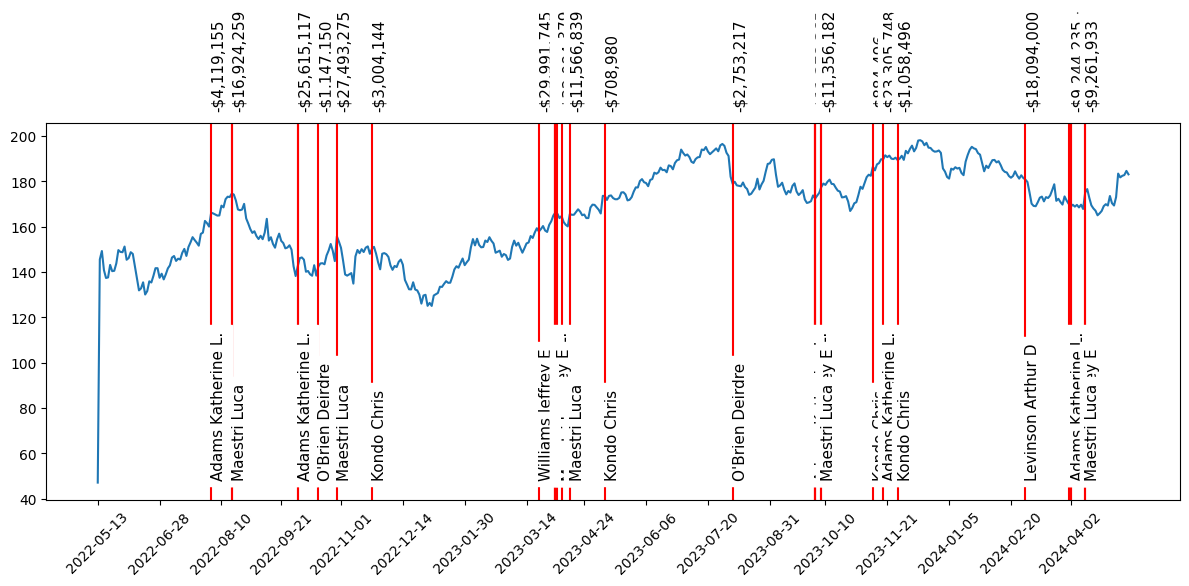

In [11]:
one = pd.read_csv(f'{ticker}.csv')
two = pd.read_csv(f'{ticker}_insider_trades.csv')

newdata = pd.merge(one, two, 'outer', left_on='Date', right_on='Trade Date')

plt.figure(figsize=(12, 6))
plt.plot(newdata['Date'], newdata['Close'], label=f'{ticker} Close Price')

insider_trade_dates = newdata[newdata['Value'].notnull()]
for index, row in insider_trade_dates.iterrows():
    if row['Value'][0] == '-': plt.axvline(x=row['Date'], color='red')
    if row['Value'][0] != '-': plt.axvline(x=row['Date'], color='green')

    plt.text(row['Date'], newdata['Close'].max() * 0.25, row['Insider Name'], rotation=90, fontsize=11, backgroundcolor='white')
    plt.text(row['Date'], newdata['Close'].max() * 1.07, row['Value'], rotation=90, fontsize=11, backgroundcolor='white')

plt.xticks(newdata['Date'][::30], rotation=45)
plt.tight_layout()
plt.show()